In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\MBM info\Desktop\AI\Visualizing\titanic-passengers.csv")
l=df.to_string().split("\n")
for i in range(len(l)):
    l[i]=l[i].split(";")
label = l[0]
dic = {label[v]:[l[i][v] for i in range(len(l))] for v in range(len(label))}
for i in range(len(label)):
    dic[label[i]]=dic[label[i]][1:]
data = pd.DataFrame(dic).to_csv('data.csv')
ndata = pd.read_csv('data.csv')
ndata.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,343,No,2,Collander ...,male,28.0,0,0,248740,13.0000,NaN,S
1,1,76,No,3,Moen ...,male,25.0,0,0,348123,7.6500,F G73,S
2,2,641,No,3,Jensen ...,male,20.0,0,0,350050,7.8542,NaN,S
3,3,568,No,3,Palsson ...,female,29.0,0,4,349909,21.0750,NaN,S
4,4,672,No,1,Davidson ...,male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
#replacing missing data by average appearences 
ndata.isnull().sum()
ndata['Age'].fillna(ndata['Age'].mean(), inplace=True)
ndata.isnull().sum()

ndata['Cabin'].value_counts()
ndata['Cabin'].fillna('G6', inplace=True) 
#verifying that data is ready to be treated
ndata.isnull().sum()

Unnamed: 0                                                          0
                                                     PassengerId    0
Survived                                                            0
Pclass                                                              0
Name                                                                0
Sex                                                                 0
Age                                                                 0
SibSp                                                               0
Parch                                                               0
Ticket                                                              0
Fare                                                                0
Cabin                                                               0
Embarked                                                            2
dtype: int64

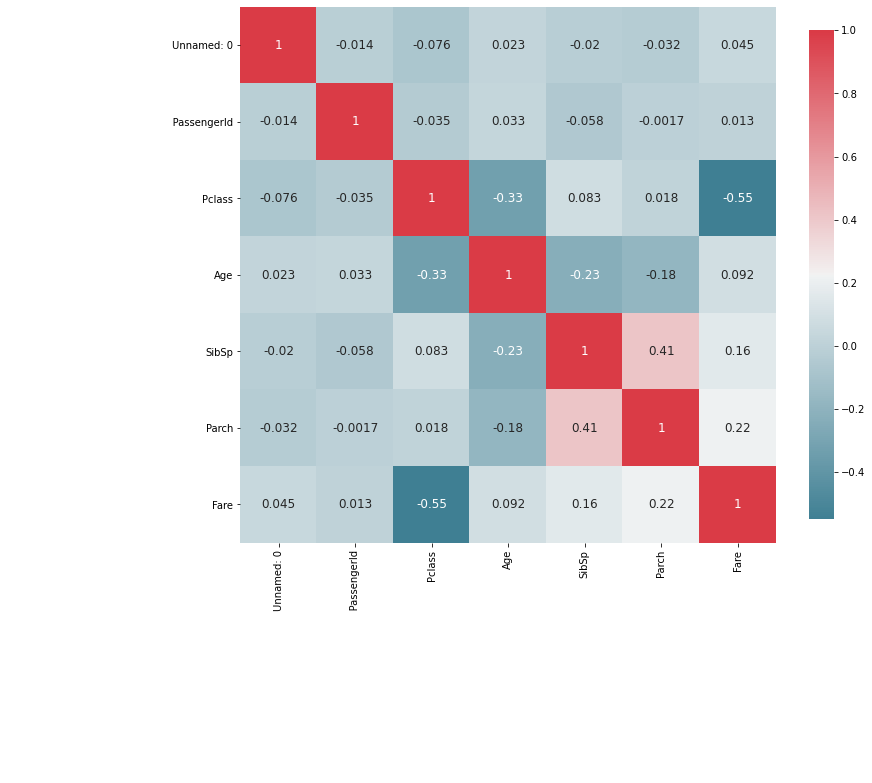

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(ndata)

#Strong correlation between Fare & Pclass because passenger's classes depends on money they spent for their classes.

#Strong correlation between SibSp & Parch : 
#         it is obvious because if there are children aboard then they must have their parents 
#         aboard also therfore it raises the number of spouses aboard.

#Strong correlation between Age & Pclass : 
#         with the Age of the passenger we mostly can predict their class on the ship.

#Medium correlation between Age & SibSp:
#         wich tells that number of siblings or spouses depends (in a way or another) on ages of passengers

#No strong or medium correlation between passengerId and any of other categorical variables :
#         wich is obvious because passengerId tells no information about passengers.


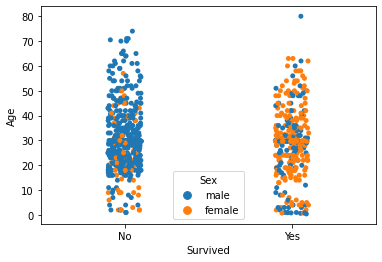

In [5]:
ax1=sns.stripplot(x="Survived", y="Age", hue="Sex", data=ndata)
#The majority of females survived due to priority protocole maybe 

In [7]:
cleanup={"Survived":{"Yes":1, "No": 0}} 
ndata.replace(cleanup, inplace=True)
ndata[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

#Chance of surviving is better if passenger is in the first class, and second class passengers 
#had more chance to survive than the third class passengers.

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [8]:
name = dic['Name']
#del ndata["Name"]
save, t= [], []
l = ["Capt.","Col.","Major.","Dr.","Rev.","Jonkheer.", "Don.","Sir." ,"Lady.","the Countess.",
     "Dona.","Mme.","Mlle.","Miss.","Ms.","Mr." ,"Mrs.","Master."]
for x in name:
    for w in x.split():
        if w in l:
            save.append(w.replace('.', ''))
save.insert(755, "the Countess")  #because it's the only title splitted into two words
            
ndata["Title"] = save
ndata.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,343,0,2,Collander ...,male,28.0,0,0,248740,13.0000,G6,S,Mr
1,1,76,0,3,Moen ...,male,25.0,0,0,348123,7.6500,F G73,S,Mr
2,2,641,0,3,Jensen ...,male,20.0,0,0,350050,7.8542,G6,S,Mr
3,3,568,0,3,Palsson ...,female,29.0,0,4,349909,21.0750,G6,S,Mrs
4,4,672,0,1,Davidson ...,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr


In [9]:
#del ndata["Title"]
Title_Dictionary = {"Capt":"Officer",
                    "Col":"Officer",
                    "Major":"Officer",
                    "Dr":"Officer",
                    "Rev":"Officer",
                    "Jonkheer":"Royalty",
                    "Don":"Royalty",
                    "Sir":"Royalty",
                    "Lady":"Royalty",
                    "the Countess":"Royalty",
                    "Dona":"Royalty",
                    "Mme":"Miss",
                    "Mlle":"Miss",
                    "Miss":"Miss",
                    "Ms":"Mrs",
                    "Mr":"Mrs",
                    "Mrs":"Mrs",
                    "Master":"Master"}
ndata["Title"] = [Title_Dictionary[v] for v in save]
ndata.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,343,0,2,Collander ...,male,28.0,0,0,248740,13.0000,G6,S,Mrs
1,1,76,0,3,Moen ...,male,25.0,0,0,348123,7.6500,F G73,S,Mrs
2,2,641,0,3,Jensen ...,male,20.0,0,0,350050,7.8542,G6,S,Mrs
3,3,568,0,3,Palsson ...,female,29.0,0,4,349909,21.0750,G6,S,Mrs
4,4,672,0,1,Davidson ...,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs


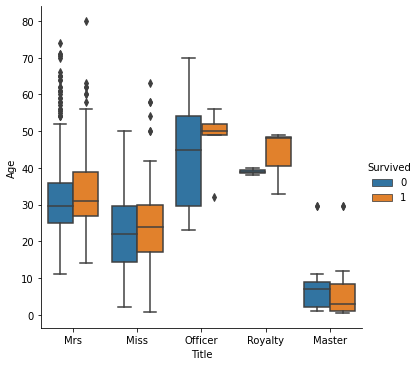

In [27]:
ax2=sns.catplot(x="Title", y="Age", hue="Survived", kind="box", data=ndata)
#being an officer aged between 30 & 55 raise the chance of dying.
#being a royalty member aged between 40 & 50 raise the chance of surviving.

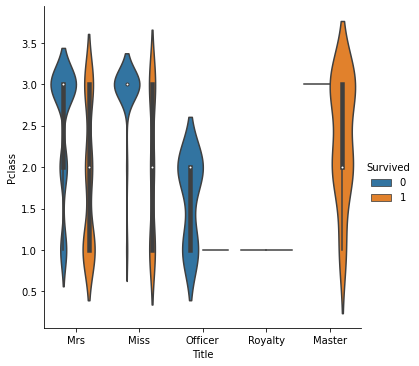

In [24]:
ax2=sns.catplot(x="Title", y="Pclass", hue="Survived",kind="violin", data=ndata)
#being a Master in the third class aboard bring more chance to survive. lol!!
#being an officer in the first or second class raise the risk of "Not Surviving".

In [35]:
ndata["FamilySize"]=ndata["SibSp"]+ndata["Parch"]+1
ndata.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,0,343,0,2,Collander ...,male,28.0,0,0,248740,13.0000,G6,S,Mrs,1
1,1,76,0,3,Moen ...,male,25.0,0,0,348123,7.6500,F G73,S,Mrs,1
2,2,641,0,3,Jensen ...,male,20.0,0,0,350050,7.8542,G6,S,Mrs,1
3,3,568,0,3,Palsson ...,female,29.0,0,4,349909,21.0750,G6,S,Mrs,5
4,4,672,0,1,Davidson ...,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs,2


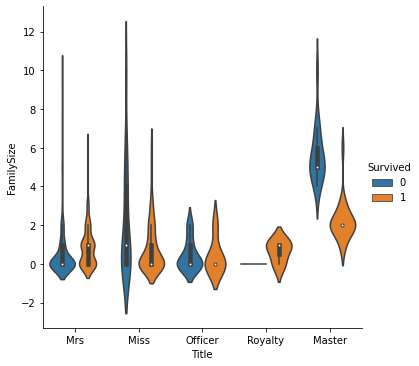

In [34]:
ax3 = sns.catplot(x="Title", y="FamilySize", hue="Survived", kind="violin", data=ndata)
#being a royalty, Miss or Master with family members aboard under 3 members bring more chance to survive.